# Recommendation Systems

In [9]:
import pandas as pd
import numpy as np

In [10]:
b = "bookr.csv"

In [11]:
import chardet
with open(b,'rb')as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.7171222254531355, 'language': ''}

In [12]:
d = pd.read_csv("bookr.csv",encoding= 'ISO-8859-1')
d

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [13]:
d = d.drop('Unnamed: 0', axis=1)

In [14]:
d= d.rename({'User.ID':'userid','Book.Title':'title','Book.Rating':'rating'},axis=1)

In [15]:
d[d.userid.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7818 entries, 2 to 9998
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userid  7818 non-null   int64 
 1   title   7818 non-null   object
 2   rating  7818 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 244.3+ KB


In [16]:
d=d.drop_duplicates()

In [17]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9998 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userid  9998 non-null   int64 
 1   title   9998 non-null   object
 2   rating  9998 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 312.4+ KB


In [18]:
d[d.userid.duplicated()].shape

(7816, 3)

In [19]:
pd.crosstab(d.userid,d.title).head()

title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
userid,,,,,,,,,,,,,,,,,,,,,
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
len(d.userid.unique())

2182

In [21]:
len(d.title.unique())

9659

In [22]:
import matplotlib.pyplot as plt
plt.rc("font", size=15)
d.rating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('rating')
plt.ylabel('Count')
plt.show()

<Figure size 640x480 with 1 Axes>

In [23]:
rating_count = pd.DataFrame(d.groupby('title')['rating'].count())
rating_count.sort_values('rating', ascending=False).head()

,rating
title,
Fahrenheit 451,5
Vanished,4
Stardust,4
Ender's Game (Ender Wiggins Saga (Paperback)),4
"The Subtle Knife (His Dark Materials, Book 2)",4


In [24]:
book = d.pivot_table(index='userid',columns='title',values='rating')
book

title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
userid,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN


In [25]:
book.fillna(0, inplace=True)

In [26]:
book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2182 entries, 8 to 278854
Columns: 9659 entries,  Jason, Madison &amp to Ã?Â?bermorgen.
dtypes: float64(9659)
memory usage: 160.8 MB


In [27]:
book.iloc[:1,:].dropna(axis=1)

title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
userid,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
d.groupby('title')['rating'].mean().sort_values(ascending=False)

title
Clear Light of Day                                         10.0
Substitute Teaching: A Handbook for Hassle-Free Subbing    10.0
Daughter of Camelot (Merlin's Legacy, No 6)                10.0
The Resourceful English Teacher                            10.0
Das verbotene Lied.                                        10.0
                                                           ... 
Time and Chance                                             1.0
Upsetting the Balance (Worldwar Series, Volume 3)           1.0
Having Our Say: The Delany Sisters' First 100 Years         1.0
Saucer                                                      1.0
THIS SIDE OF PARADISE (A Scribner Classic)                  1.0
Name: rating, Length: 9659, dtype: float64

In [29]:
d.groupby('title')['rating'].count().sort_values(ascending=False)

title
Fahrenheit 451                                                                                  5
The Amber Spyglass (His Dark Materials, Book 3)                                                 4
The Subtle Knife (His Dark Materials, Book 2)                                                   4
Ender's Game (Ender Wiggins Saga (Paperback))                                                   4
Vanished                                                                                        4
                                                                                               ..
Son of \It Was a Dark and Stormy Night\: More of the Best (? from the Bulwer-Lytton Contest)    1
Son Rise: The Miracle Continues                                                                 1
Sommer Ende Zwanzig.                                                                            1
Somewhere, Someday                                                                              1
 Jason, Madiso

In [30]:
ratings = pd.DataFrame(d.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
"Jason, Madison &amp",8.0
Other Stories;Merril;1985;McClelland &amp,6.0
Repairing PC Drives &amp,4.0
'48,7.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0


In [31]:
ratings['num of ratings'] = pd.DataFrame(d.groupby('title')['rating'].count())
ratings.sort_values('num of ratings', ascending=False)

,rating,num of ratings
title,,
Fahrenheit 451,7.00,5
Vanished,6.50,4
Stardust,8.50,4
Ender's Game (Ender Wiggins Saga (Paperback)),6.25,4
"The Subtle Knife (His Dark Materials, Book 2)",8.75,4
...,...,...
"His-And-Hers Twins (Harlequin American Romance, No. 820)",10.00,1
Histoires Extraordinaires,7.00,1
Historia de la vida del BuscÃ³n (Selecciones Austral ; 24 : ClÃ¡sicos),10.00,1


In [32]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Fahrenheit 451,7.000000,5
Vanished,6.500000,4
Stardust,8.500000,4
Ender's Game (Ender Wiggins Saga (Paperback)),6.250000,4
"The Subtle Knife (His Dark Materials, Book 2)",8.750000,4
"The Amber Spyglass (His Dark Materials, Book 3)",8.250000,4
Charlie and the Chocolate Factory,6.500000,4
The Hitchhiker's Guide to the Galaxy,8.333333,3
"The Golden Compass (His Dark Materials, Book 1)",8.333333,3


<AxesSubplot:>

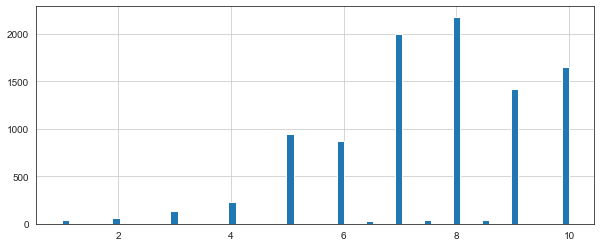

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

<AxesSubplot:>

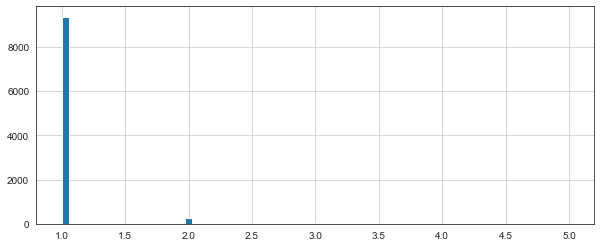

In [34]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

In [35]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Fahrenheit 451,7.000000,5
Vanished,6.500000,4
Stardust,8.500000,4
Ender's Game (Ender Wiggins Saga (Paperback)),6.250000,4
"The Subtle Knife (His Dark Materials, Book 2)",8.750000,4
"The Amber Spyglass (His Dark Materials, Book 3)",8.250000,4
Charlie and the Chocolate Factory,6.500000,4
The Hitchhiker's Guide to the Galaxy,8.333333,3
"The Golden Compass (His Dark Materials, Book 1)",8.333333,3


In [36]:
vanished_user_ratings = book['Vanished']
vanished_user_ratings.dropna()

userid
8         0.0
9         0.0
10        0.0
12        0.0
14        0.0
         ... 
278846    0.0
278849    0.0
278851    0.0
278852    0.0
278854    0.0
Name: Vanished, Length: 2182, dtype: float64

In [37]:
similar_to_vanished = book.corrwith(vanished_user_ratings)

In [38]:
corr_vanished = pd.DataFrame(similar_to_vanished,columns=['Correlation'])
corr_vanished.dropna(inplace=True)
corr_vanished

,Correlation
title,
"Jason, Madison &amp",-0.000904
Other Stories;Merril;1985;McClelland &amp,-0.000904
Repairing PC Drives &amp,-0.000904
'48,-0.000904
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,-0.000904
...,...
"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",-0.000904
"\Well, there's your problem\: Cartoons",-0.000904
iI Paradiso Degli Orchi,-0.000904


## Since Many books are uncorrelated with respect to users we use item similarity
## We will recommend books based on user-user similarity and item-item similarity. 

In [39]:
d

,userid,title,rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [40]:
m = d.rating.quantile(0.90)
print(m)

10.0


In [41]:
q_Books = d.copy().loc[d.rating >= m]
q_Books.shape

(1732, 3)

In [42]:
#Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [48]:
book

title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
userid,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [49]:
uc_sim = 1 - pairwise_distances( book.values,metric='cosine')
uc_sim.shape

(2182, 2182)

In [50]:
#Store the results in a dataframe
uc_sim_df = pd.DataFrame(uc_sim)
uc_sim_df.index = d.userid.unique()
uc_sim_df.columns = d.userid.unique()

In [51]:
uc_sim_df.idxmax(axis=1)[0:125]

276726    276726
276729    276729
276736    276736
276737    276737
276744    276744
           ...  
277139    277139
277143    277143
277157    277157
277159    277159
277165    277165
Length: 125, dtype: int64

In [53]:
u=d[(d['userid']==276726) | (d['userid']==17)]
u

,userid,title,rating
0,276726,Classical Mythology,5
2413,17,Conversations With Dogbert: A Dilbert Book,7
2414,17,The Dilbert Bunch: A Dilbert Book (Main Street...,5
2415,17,You Don't Need Experience if You've Got Attitude,6
2416,17,"The Boss: Nameless, Blameless and Shameless (A...",3


In [54]:
indices = pd.Series(d.index, index=d.title).drop_duplicates()

In [55]:
indices[:10]

title
Classical Mythology                                                                                   0
Clara Callan                                                                                          1
Decision in Normandy                                                                                  2
Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It    3
The Mummies of Urumchi                                                                                4
The Kitchen God's Wife                                                                                5
What If?: The World's Foremost Military Historians Imagine What Might Have Been                       6
PLEADING GUILTY                                                                                       7
Under the Black Flag: The Romance and the Reality of Life Among the Pirates                           8
Where You'll Find Me: And Other Stories                   

In [56]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(book_title, cosine_sim=uc_sim):
    # Get the index of the books that matches the title
    idx = indices[book_title]

    # Get the pairwsie similarity scores of all books with that books
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the books based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar books
    sim_scores = sim_scores[0:11]

    # Get the book indices
    books_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar books
    return d.title.iloc[books_indices]

In [57]:
a=get_recommendations('Clara Callan')
a

1                                          Clara Callan
0                                   Classical Mythology
2                                  Decision in Normandy
3     Flu: The Story of the Great Influenza Pandemic...
4                                The Mummies of Urumchi
5                                The Kitchen God's Wife
6     What If?: The World's Foremost Military Histor...
7                                       PLEADING GUILTY
8     Under the Black Flag: The Romance and the Real...
9               Where You'll Find Me: And Other Stories
10                          Nights Below Station Street
Name: title, dtype: object

In [58]:
#Finding the correlation with different movies
similar_to_book = book.corrwith(book['Clara Callan']) 

In [59]:
corr_book = pd.DataFrame(similar_to_book, columns=['Correlation'])
corr_book.dropna(inplace=True)
corr_book.head()

,Correlation
title,
"Jason, Madison &amp",-0.000459
Other Stories;Merril;1985;McClelland &amp,-0.000459
Repairing PC Drives &amp,-0.000459
'48,-0.000459
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,-0.000459


In [60]:
corr_book[corr_book['Correlation'] > 0].sort_values(by='Correlation', ascending=False).head(10)  

,Correlation
title,
Clara Callan,1.0
Decision in Normandy,1.0


In [61]:
similar_to_book = book.corrwith(book['Vanished']) 

In [62]:
corr_book = pd.DataFrame(similar_to_book, columns=['Correlation'])
corr_book.dropna(inplace=True)
corr_book.head()

,Correlation
title,
"Jason, Madison &amp",-0.000904
Other Stories;Merril;1985;McClelland &amp,-0.000904
Repairing PC Drives &amp,-0.000904
'48,-0.000904
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,-0.000904


In [63]:
corr_book[corr_book['Correlation'] > 0].sort_values(by='Correlation', ascending=False).head(10)  

,Correlation
title,
Vanished,1.000000
Downhill Chance,0.454464
"So Long, See You Tomorrow",0.454464
The Northern Lights,0.454464
Donovan's Station: A Novel,0.454464
Oxygen,0.454464
Kits Law,0.454464
Home From the Vinyl Cafe,0.454464
The LAST PICTURE SHOW : A Novel,0.454464


In [64]:
ratings_mean_count = pd.DataFrame(d.groupby('title')['rating'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(d.groupby('title')['rating'].count())

<AxesSubplot:>

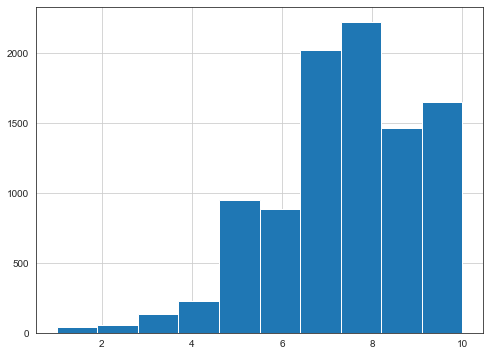

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating'].hist(bins=10)

# Conclusion:-
# From the output you can see that the Books that have high correlation are not very well known. This shows that correlation alone is not a good metric for similarity because there can be a user who wished to take those Books  and only  other books and rated  them same.
## Recommendation is based on Rating.